In [1]:
import pandas as pd
nao_df = pd.read_excel('combined_data.xlsx', sheet_name='NAO')
npi_df = pd.read_excel('combined_data.xlsx', sheet_name='NPI')
oni_df = pd.read_excel('combined_data.xlsx', sheet_name='ONI')
prices_df = pd.read_excel('combined_data.xlsx', sheet_name='PRICES')

#combined_df = nao_df.merge(npi_df, prices_df, on='Date', how='outer').merge(oni_df, on="Date", how='outer').merge(prices_df, on="Date", how='outer')
merged_df = nao_df.merge(npi_df, on='Date', how='outer') \
                   .merge(oni_df, on='Date', how='outer') \
                   .merge(prices_df, on='Date', how='outer')
print(merged_df)



           Date  NAOChange  NPIChange  ONIChange  Price
0    1900-01-01        NaN      -0.82        NaN    NaN
1    1900-02-01        NaN      -0.22        NaN    NaN
2    1900-03-01        NaN      -1.21        NaN    NaN
3    1900-04-01        NaN       7.95        NaN    NaN
4    1900-05-01        NaN      -0.60        NaN    NaN
...         ...        ...        ...        ...    ...
1495 2024-08-01       0.63       0.00      -0.11   1.99
1496 2024-09-01      -1.43       0.00        NaN   2.28
1497 2024-10-01        NaN       0.00        NaN    NaN
1498 2024-11-01        NaN       0.00        NaN    NaN
1499 2024-12-01        NaN       0.00        NaN    NaN

[1500 rows x 5 columns]


In [2]:
print(merged_df.describe())

                      Date   NAOChange    NPIChange   ONIChange       Price
count                 1500  897.000000  1500.000000  896.000000  333.000000
mean   1962-06-16 14:04:48   -0.005061     0.008733    0.015268    4.137718
min    1900-01-01 00:00:00   -3.180000   -14.340000   -2.030000    1.490000
25%    1931-03-24 06:00:00   -0.750000    -2.385000   -0.570000    2.590000
50%    1962-06-16 00:00:00    0.040000    -0.160000   -0.040000    3.450000
75%    1993-09-08 12:00:00    0.720000     2.275000    0.540000    5.260000
max    2024-12-01 00:00:00    3.040000    15.650000    2.640000   13.420000
std                    NaN    1.022683     3.961162    0.837926    2.151023


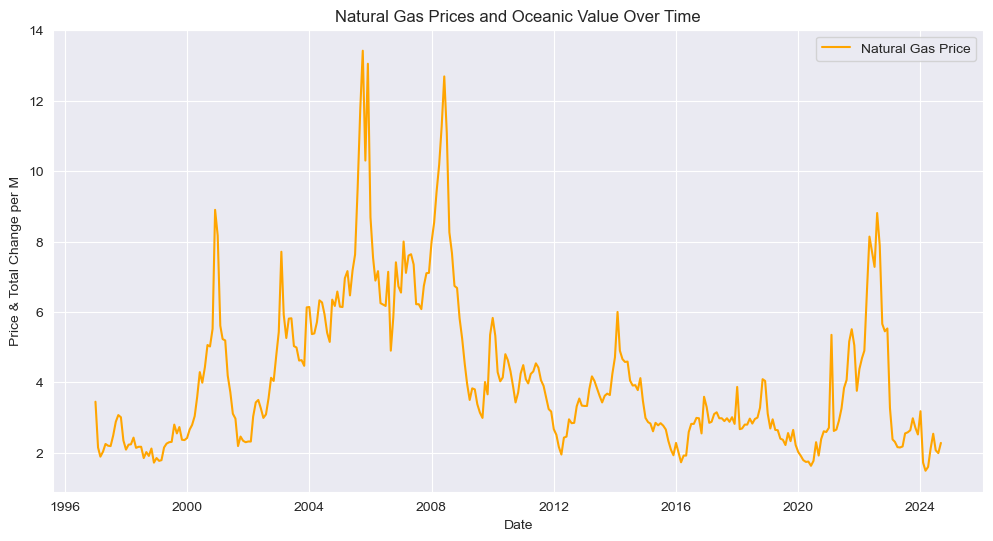

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Prices over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Price'], label='Natural Gas Price', color='orange')

plt.title('Natural Gas Prices and Oceanic Value Over Time')
plt.xlabel('Date')
plt.ylabel('Price & Total Change per M')
plt.legend()
plt.show()

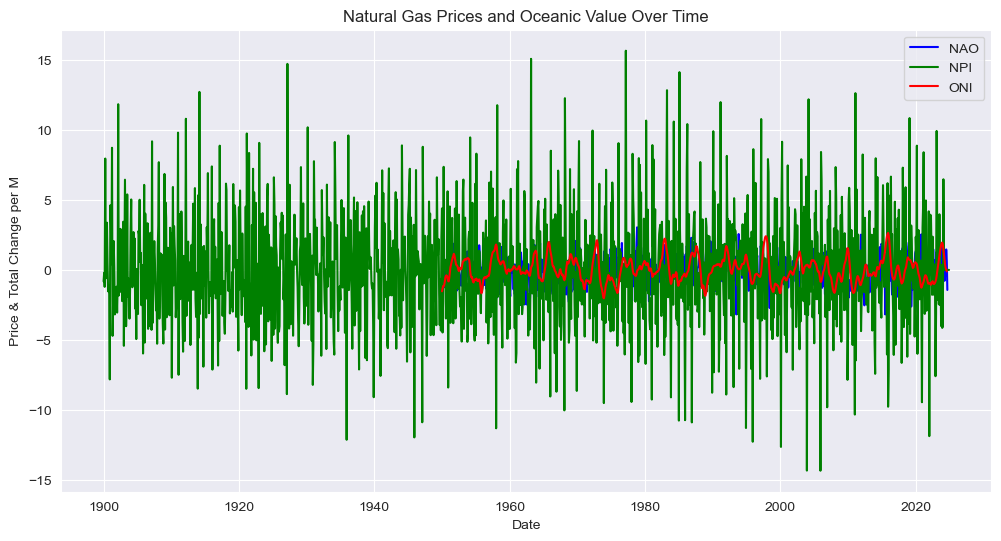

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Prices over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['NAOChange'], label='NAO', color='blue')
plt.plot(merged_df['Date'], merged_df['NPIChange'], label='NPI', color='green')
plt.plot(merged_df['Date'], merged_df['ONIChange'], label='ONI', color='red')

plt.title('Natural Gas Prices and Oceanic Value Over Time')
plt.xlabel('Date')
plt.ylabel('Price & Total Change per M')
plt.legend()
plt.show()

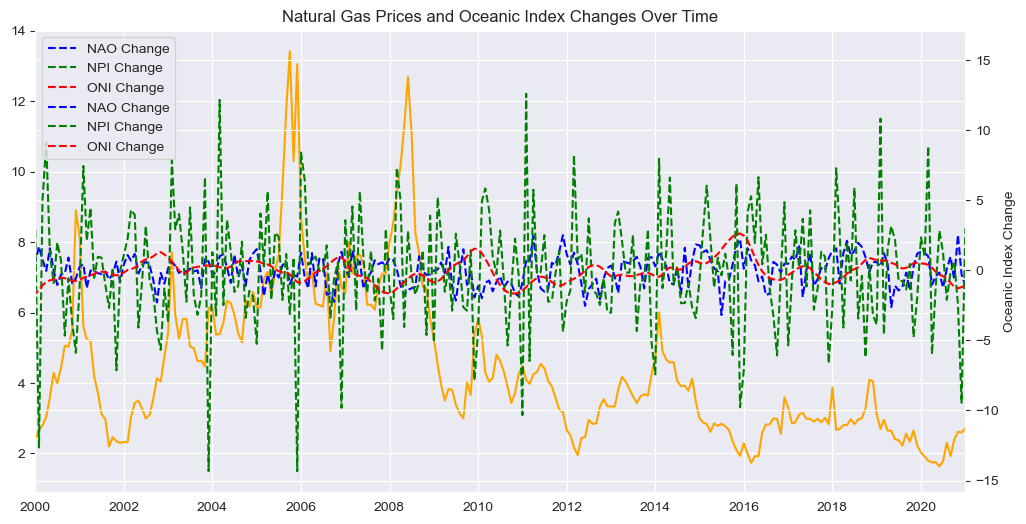

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plotting Natural Gas Prices on the primary y-axis
plt.plot(merged_df['Date'], merged_df['Price'], label='Natural Gas Price', color='orange')

# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plotting Oceanic Index Changes on the secondary y-axis
ax2.plot(merged_df['Date'], merged_df['NAOChange'], label='NAO Change', color='blue', linestyle='--')
ax2.plot(merged_df['Date'], merged_df['NPIChange'], label='NPI Change', color='green', linestyle='--')
ax2.plot(merged_df['Date'], merged_df['ONIChange'], label='ONI Change', color='red', linestyle='--')

# Set titles and labels
plt.title('Natural Gas Prices and Oceanic Index Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
ax2.set_ylabel('Oceanic Index Change')

# Create legends for both axes
lines1, labels1 = plt.gca().get_legend_handles_labels()  # Primary axis legend
lines2, labels2 = ax2.get_legend_handles_labels()         # Secondary axis legend
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
# Set the x-axis limits to the desired range
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))  # Example range

# Show the plot
plt.show()


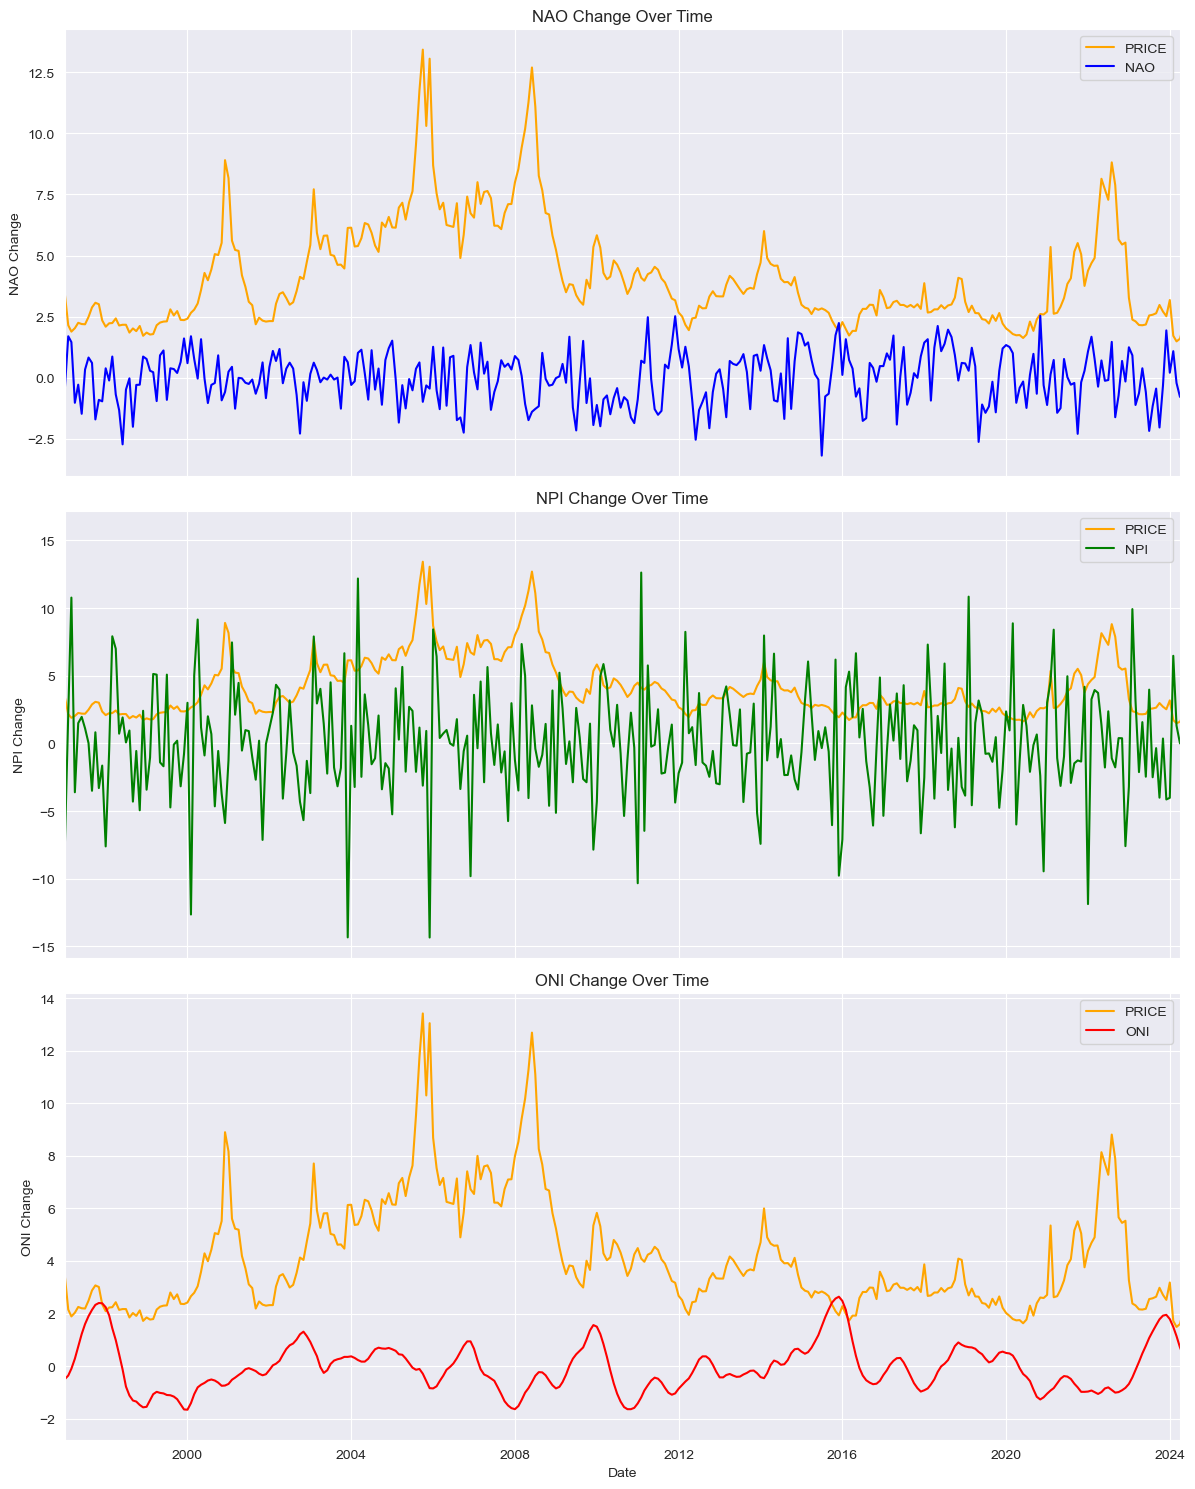

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace this with your actual merged DataFrame)
# merged_df = pd.read_excel('path_to_your_merged_data.xlsx')

# Ensure 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create a figure and an array of axes
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  # 3 rows, 1 column


# Plot Price with NAO on the first subplot
axs[0].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[0].set_title('Price Change Over Time')
axs[0].set_ylabel('Price Change')
axs[0].legend()

# Plot NAO on the first subplot
axs[0].plot(merged_df['Date'], merged_df['NAOChange'], label='NAO', color='blue')
axs[0].set_title('NAO Change Over Time')
axs[0].set_ylabel('NAO Change')
axs[0].legend()

# Plot Price with NPI on the first subplot
axs[1].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[1].set_title('Price Change Over Time')
axs[1].set_ylabel('Price Change')
axs[1].legend()
# Plot NPI on the second subplot
axs[1].plot(merged_df['Date'], merged_df['NPIChange'], label='NPI', color='green')
axs[1].set_title('NPI Change Over Time')
axs[1].set_ylabel('NPI Change')
axs[1].legend()

# Plot Price with ONI on the first subplot
axs[2].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[2].set_title('Price Change Over Time')
axs[2].set_ylabel('Price Change')
axs[2].legend()
# Plot ONI on the third subplot
axs[2].plot(merged_df['Date'], merged_df['ONIChange'], label='ONI', color='red')
axs[2].set_title('ONI Change Over Time')
axs[2].set_ylabel('ONI Change')
axs[2].set_xlabel('Date')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.xlim(pd.Timestamp('1997-01-01'), pd.Timestamp('2024-04-1'))  # Example range
# Show the plot
plt.show()

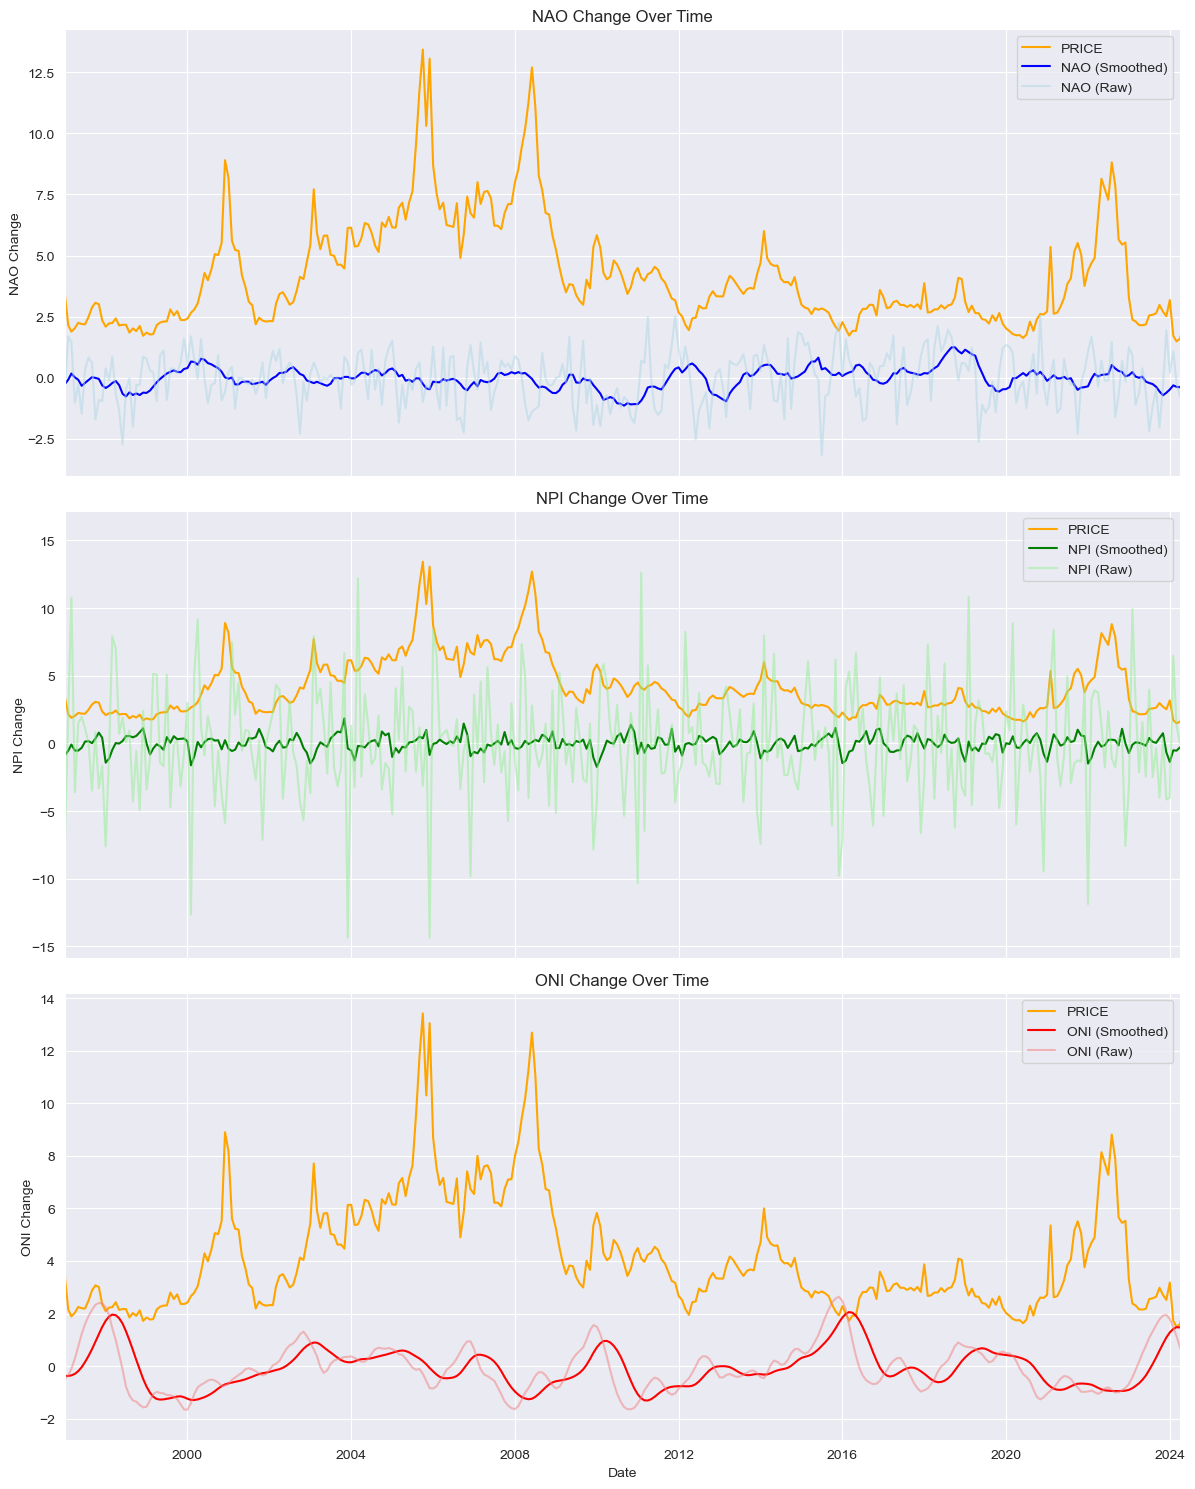

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
# Sample DataFrame (replace this with your actual merged DataFrame)
# merged_df = pd.read_excel('path_to_your_merged_data.xlsx')

# Ensure 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
window_size = 10
# Apply smoothing using rolling average
merged_df['NAOChange_Smooth'] = merged_df['NAOChange'].rolling(window=window_size).mean()
merged_df['NPIChange_Smooth'] = merged_df['NPIChange'].rolling(window=window_size).mean()
merged_df['ONIChange_Smooth'] = merged_df['ONIChange'].rolling(window=window_size).mean()
# Create a figure and an array of axes
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  # 3 rows, 1 column


# Plot Price with NAO on the first subplot
axs[0].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[0].set_title('Price Change Over Time')
axs[0].set_ylabel('Price Change')
axs[0].legend()

# Plot NAO on the first subplot
axs[0].plot(merged_df['Date'], merged_df['NAOChange_Smooth'], label='NAO (Smoothed)', color='blue')
axs[0].plot(merged_df['Date'], merged_df['NAOChange'], label='NAO (Raw)', color='lightblue', alpha=0.5)  # Raw data for comparison
axs[0].set_title('NAO Change Over Time')
axs[0].set_ylabel('NAO Change')
axs[0].legend()

# Plot Price with NPI on the first subplot
axs[1].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[1].set_title('Price Change Over Time')
axs[1].set_ylabel('Price Change')
axs[1].legend()


# Plot NPI on the second subplot
axs[1].plot(merged_df['Date'], merged_df['NPIChange_Smooth'], label='NPI (Smoothed)', color='green')
axs[1].plot(merged_df['Date'], merged_df['NPIChange'], label='NPI (Raw)', color='lightgreen', alpha=0.5)  # Raw data for comparison
axs[1].set_title('NPI Change Over Time')
axs[1].set_ylabel('NPI Change')
axs[1].legend()

# Plot Price with ONI on the first subplot
axs[2].plot(merged_df['Date'], merged_df['Price'], label='PRICE', color='orange')
axs[2].set_title('Price Change Over Time')
axs[2].set_ylabel('Price Change')
axs[2].legend()


# Plot ONI on the third subplot
axs[2].plot(merged_df['Date'], merged_df['ONIChange_Smooth'], label='ONI (Smoothed)', color='red')
axs[2].plot(merged_df['Date'], merged_df['ONIChange'], label='ONI (Raw)', color='lightcoral', alpha=0.5)  # Raw data for comparison
axs[2].set_title('ONI Change Over Time')
axs[2].set_ylabel('ONI Change')
axs[2].set_xlabel('Date')
axs[2].legend()


# Adjust layout
plt.tight_layout()
plt.xlim(pd.Timestamp('1997-01-01'), pd.Timestamp('2024-04-1'))  # Example range
# Show the plot
plt.show()